### About Dataset

The dataset pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes data

Columns: 

1. longitude: A measure of how far west a house is

2. latitude: A measure of how far north a house is

3. housing_median_age: Median age of a house within a block

4. total_rooms: Total number of rooms within a block

5. total_bedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. median_house_value: Median house value for households within a block (measured in US Dollars)

10. ocean_proximity: Location of the house with reference to ocean/sea


### Objective: 

Objective here is to perform data processing and exploratory data analysis on this dataset and use it for Regression Models to predict the district's median housing value, train a machine learning algorithm and provide results of the models performance in this report.

In [72]:
# import libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor



In [2]:
# load data

df = pd.read_csv("./California_housing_prices .csv")


# EDA

In [3]:
# showing last 10 rows

df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [4]:
# showing the data shape 

df.shape

(20640, 10)

In [5]:
# columns names

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

It appears the dataset contains 20640 observations and 10 columns. All attributes are numerical except the ocean_proximity field, it's type is object. We can notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 entries are missing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
# checking missing data 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# checking for duplicates
df.duplicated().sum()


0

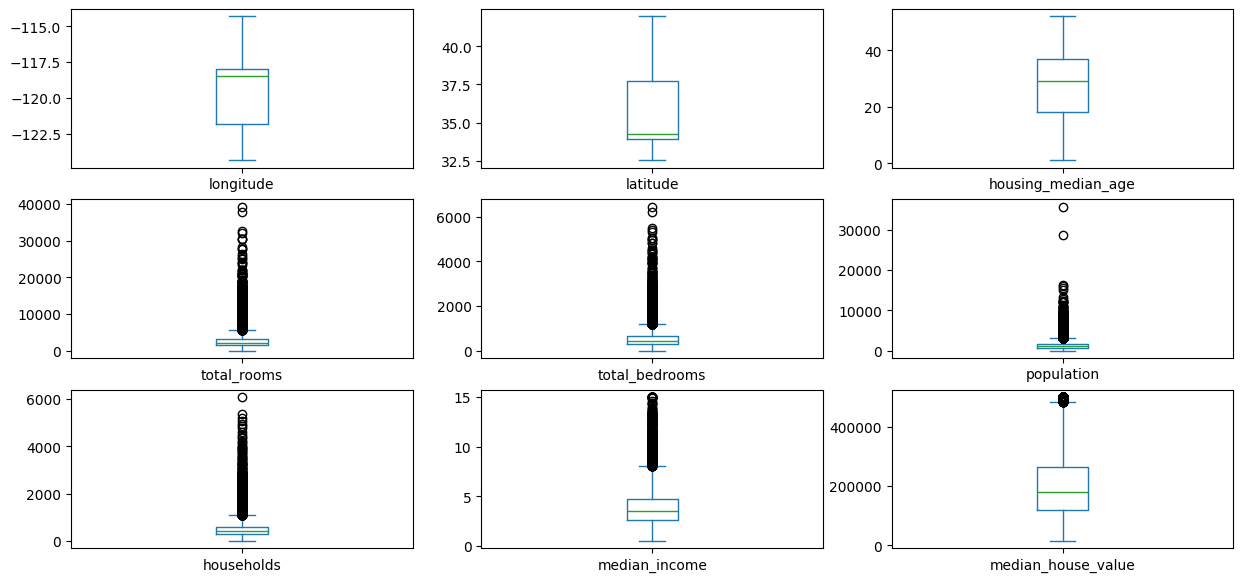

In [10]:
# checking for outliers

df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

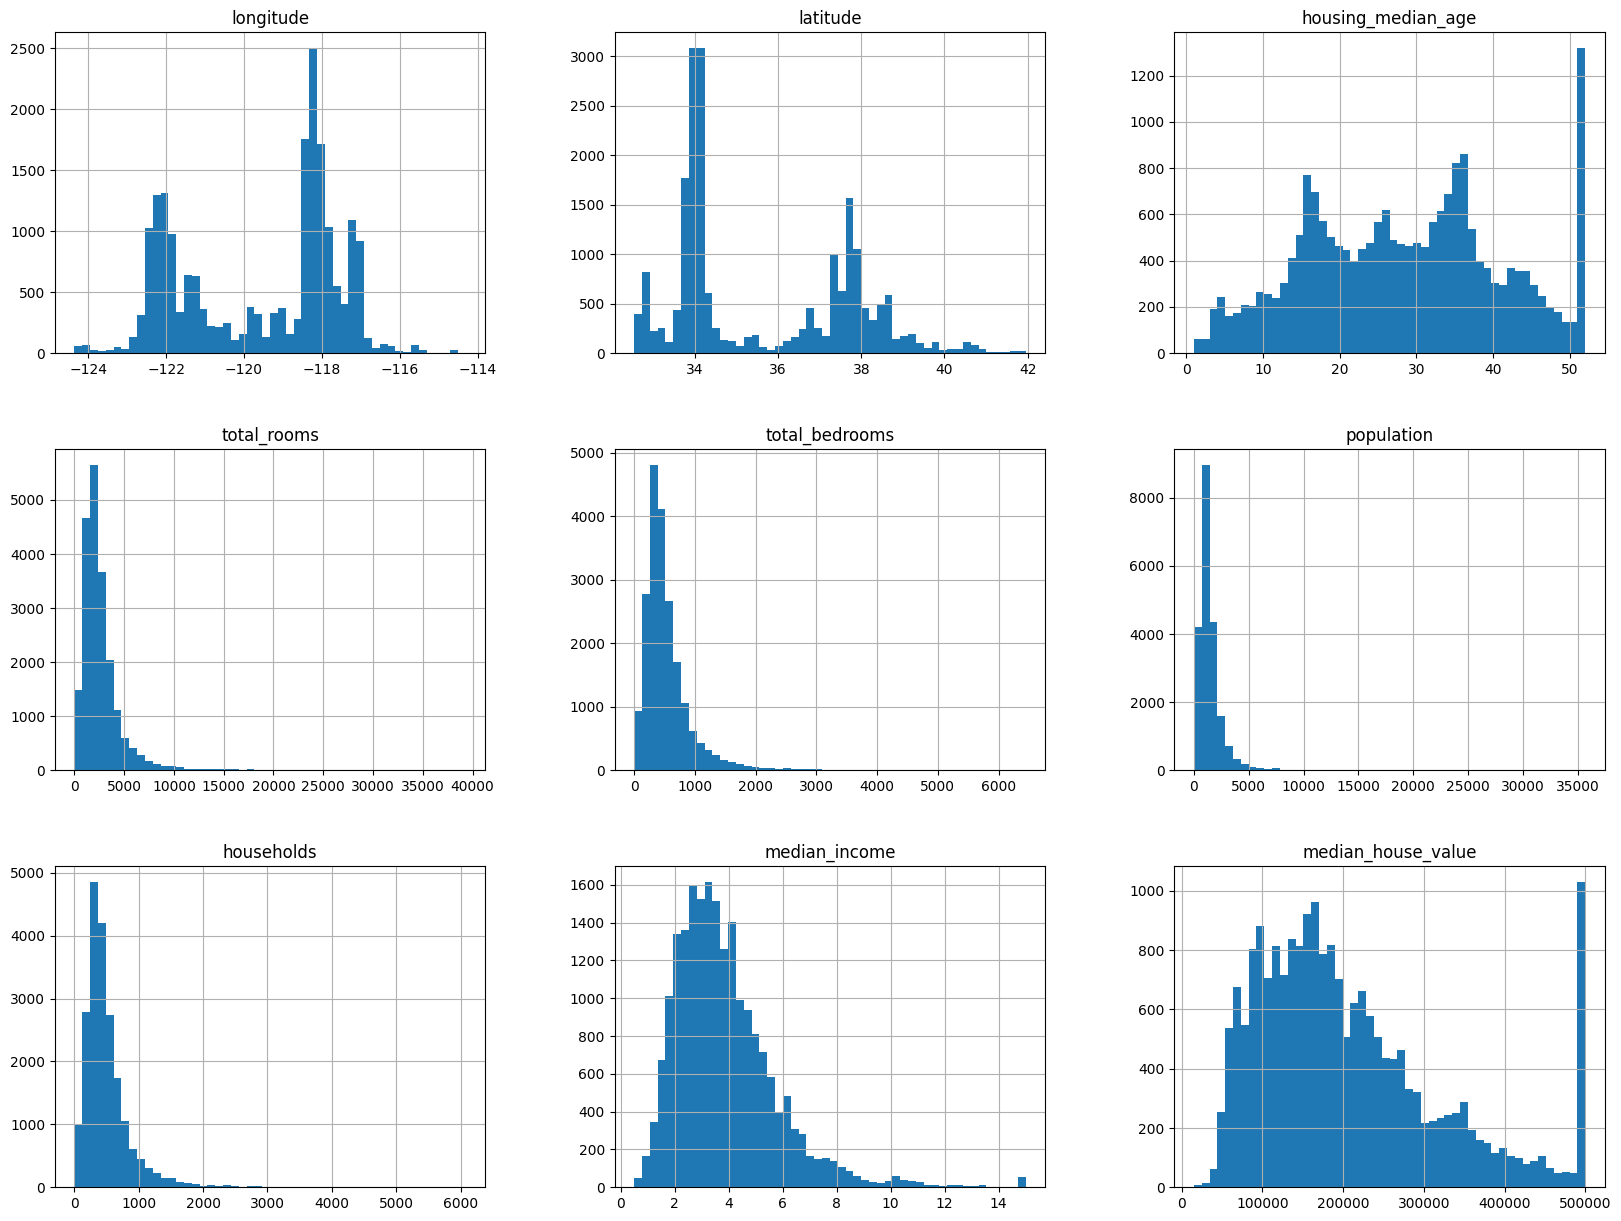

In [11]:
# plotting the distribution of variables 

df.hist(bins=50,figsize=(20,15))
plt.show()

Box plot and histogram are employed to visualise data distribution and check for outliers. it’s noticeable that Median_house_value has an odd peak at its maximum value around 500k, which could be an outlier. We have quite a few skewed data distributions, households, Population, total_bedrooms, total_rooms and median_income. The range of the x axis for these features is quite broad, indicating we have quite a few outliers. Population, total_bedrooms and total_rooms represent somewhat connected values, also have similar distribution which is skewed towards smaller values.


<Figure size 640x480 with 0 Axes>

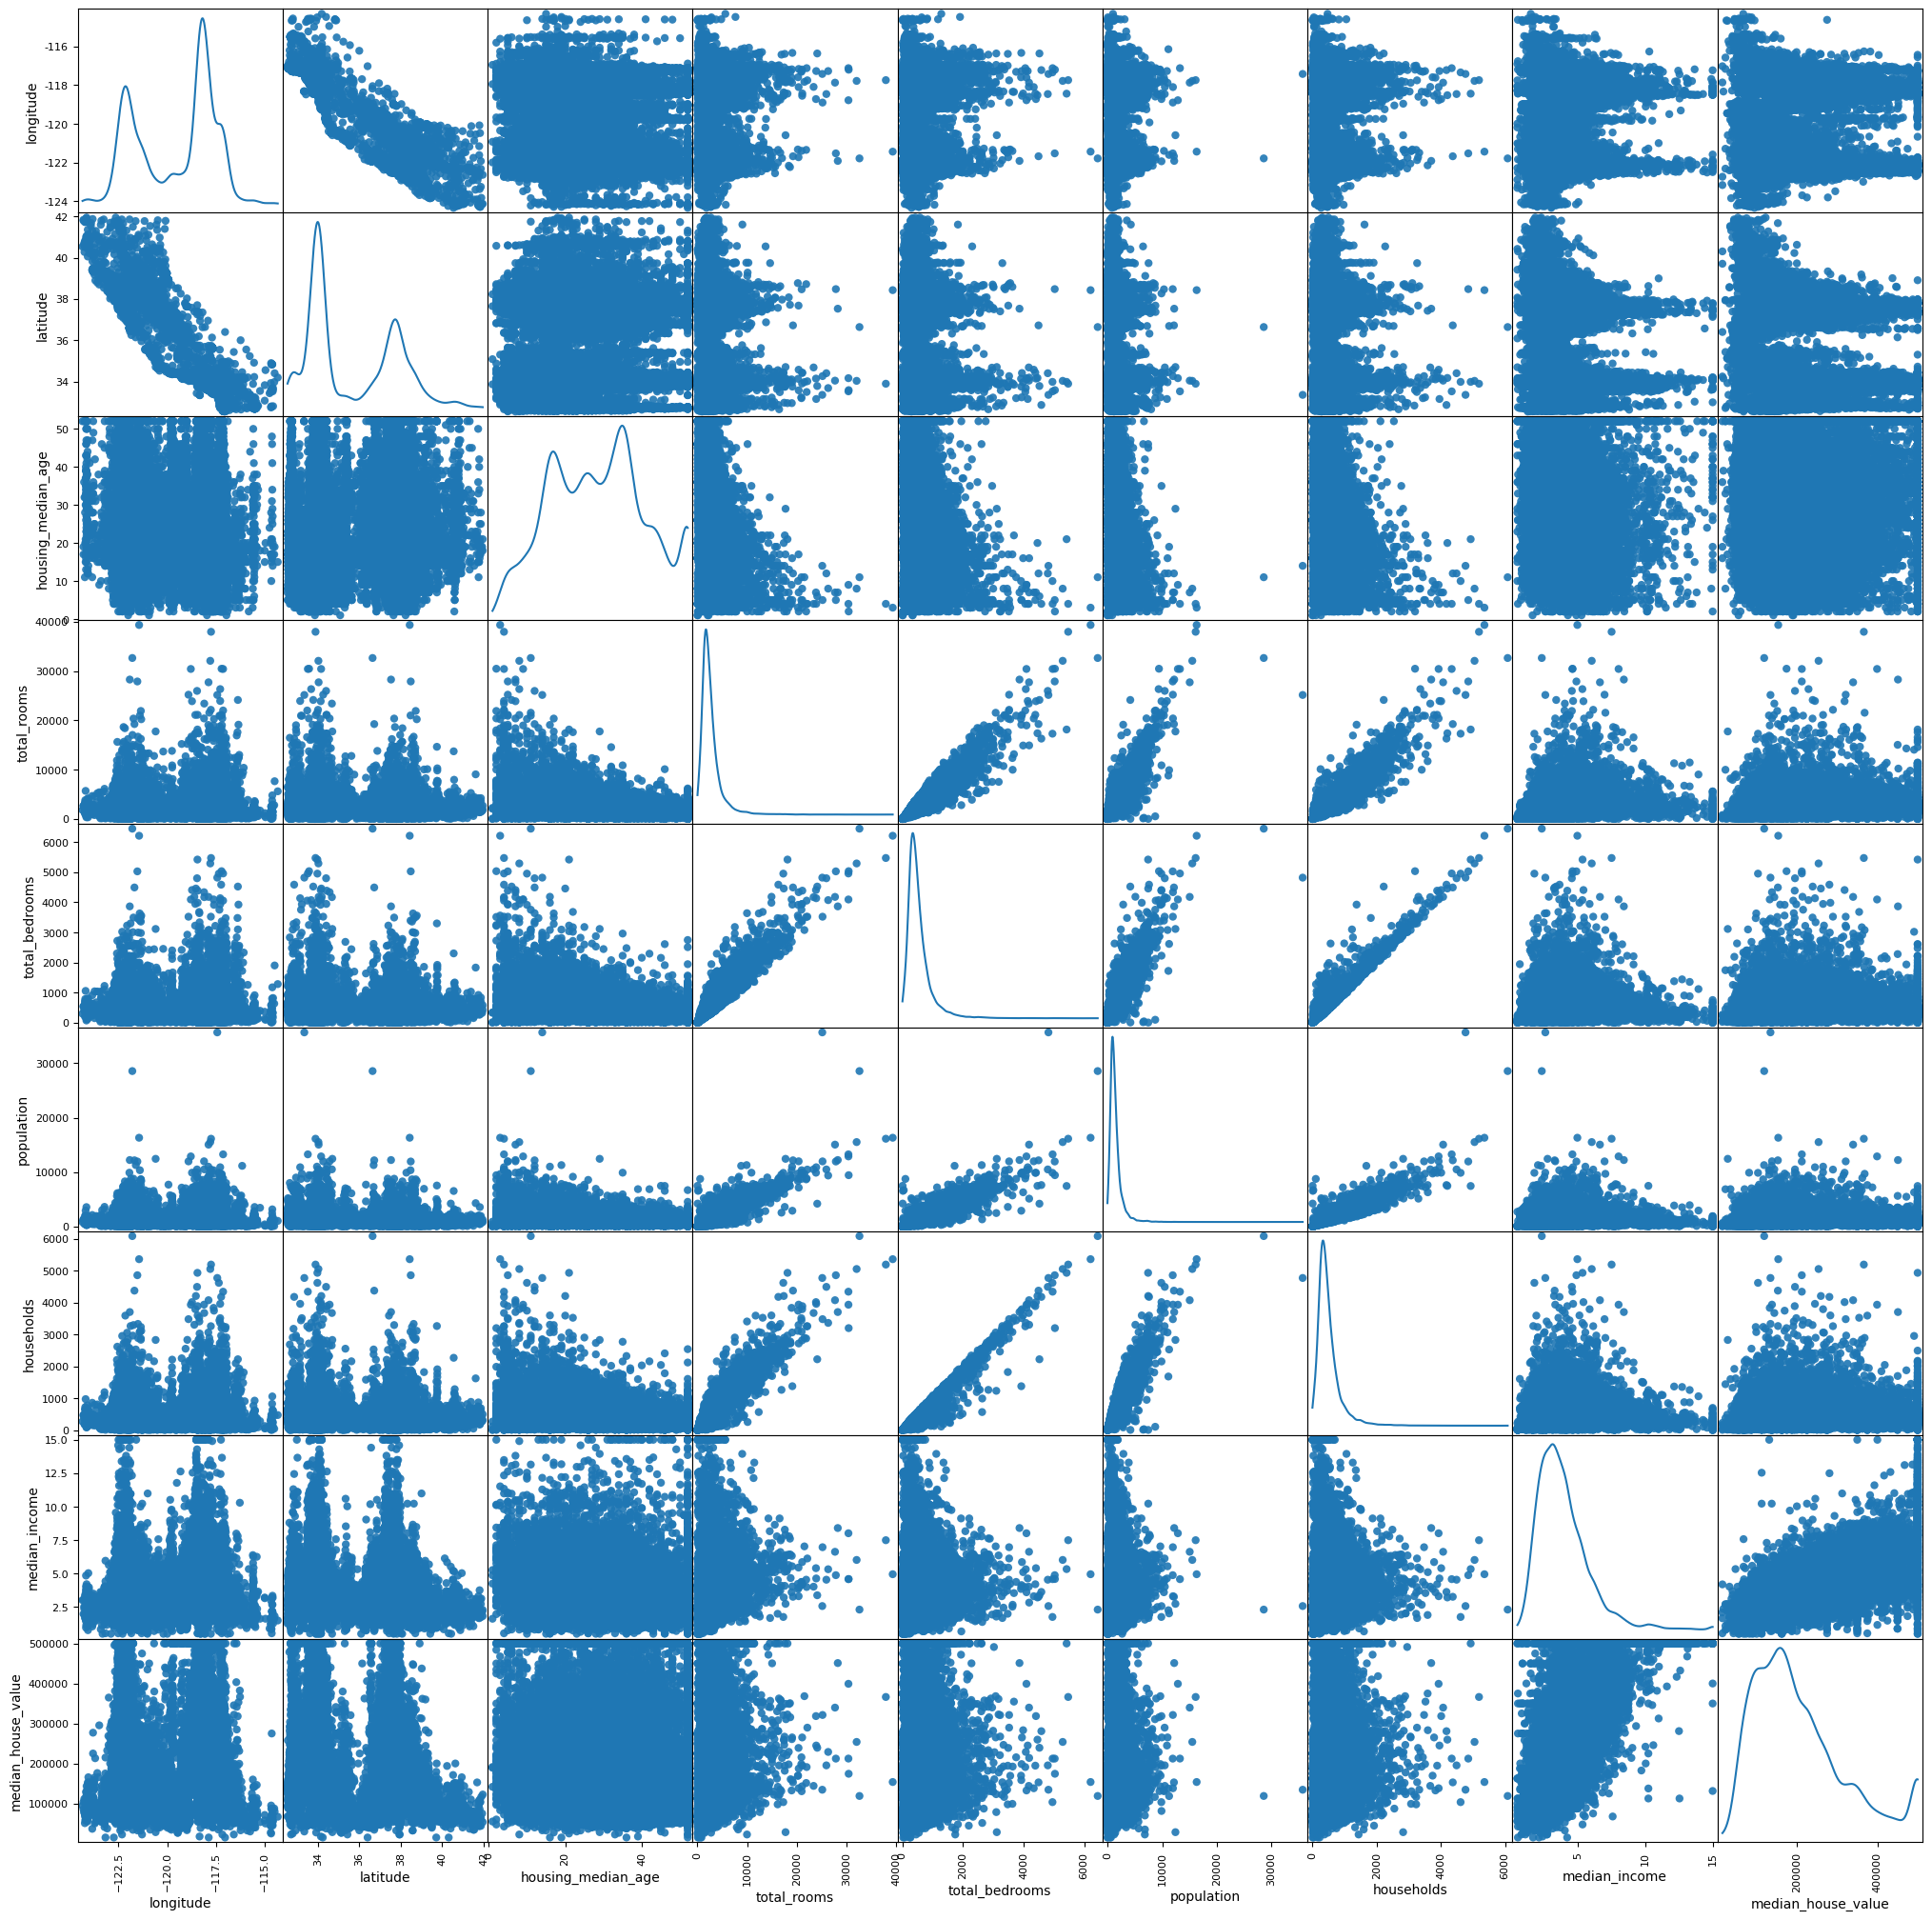

In [12]:
# displaying scatter plot between variables  

fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");
plt.show()

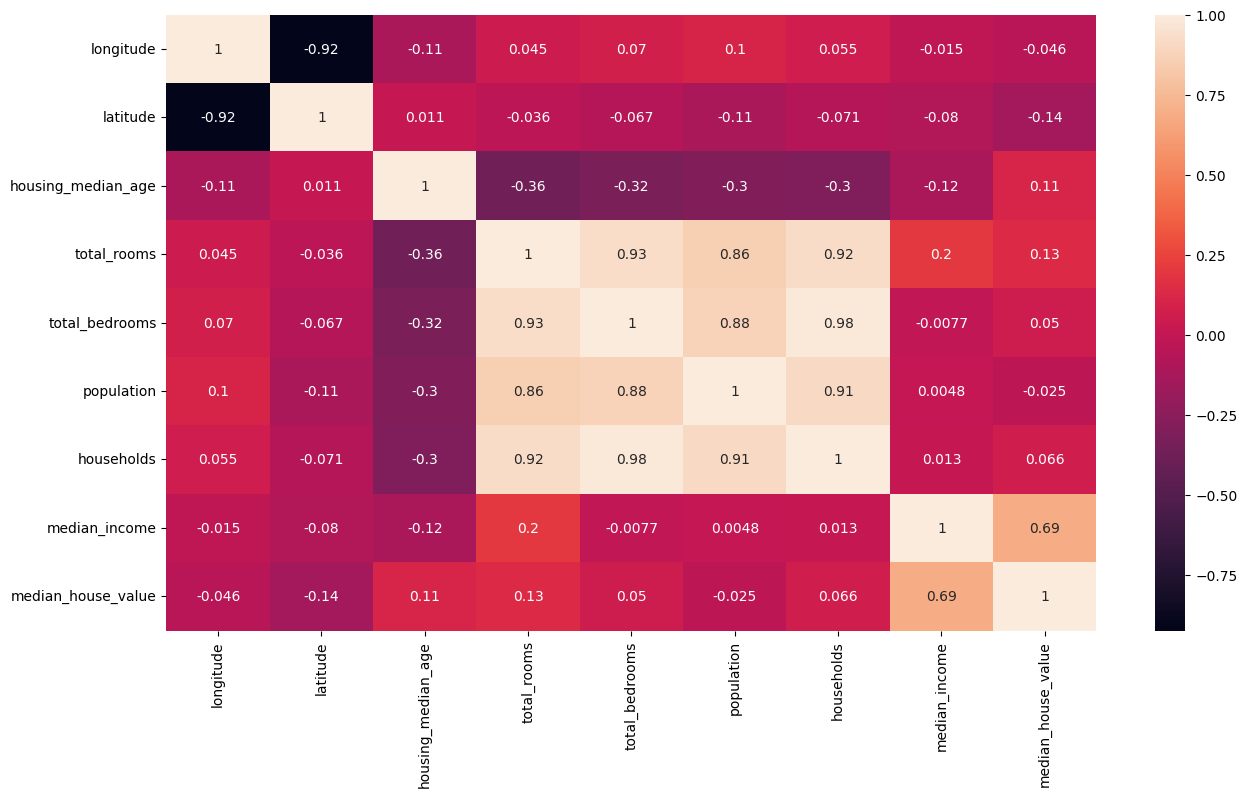

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

In [14]:
# Correlation between dependant variable and independent variables

corr_matrix = df.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

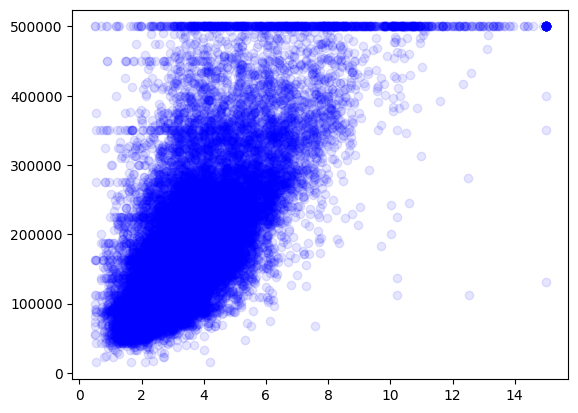

In [15]:
# check scatter plot between median_income and median_house_value

plt.scatter(df["median_income"],df["median_house_value"], alpha=0.1,color="b")

Target variable median_house_value is very mildly correlated to all but one feature median_income, so we can outline this as an important feature. The scatter plot show a strong liner relationship between the two valuables. households, Population, total_bedrooms and total_rooms appear to have very strong correlation. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. As my primary goal is to make predictions, and I don’t need to understand the role of each independent variable, I don’t need to reduce multicollinearity. longitude and latitude, they also have very strong correlation.


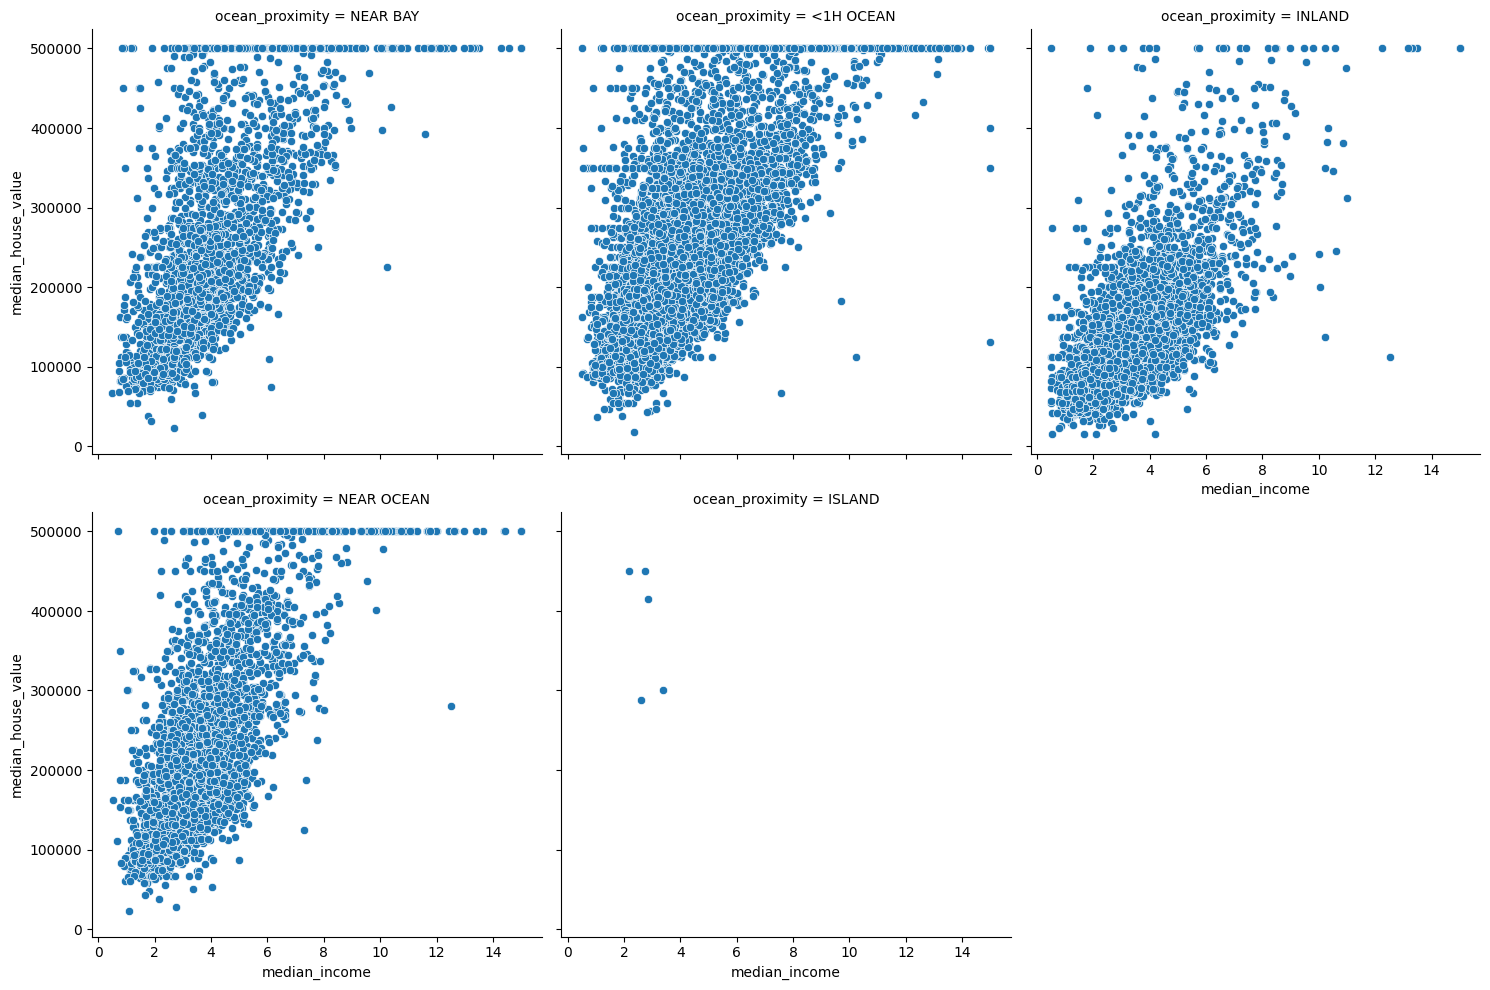

In [16]:
# ploting between median_income and median_house_value at each ocean_proximity

sns.relplot(x=df["median_income"],y=df['median_house_value'],col=df["ocean_proximity"],col_wrap=3)
plt.show()

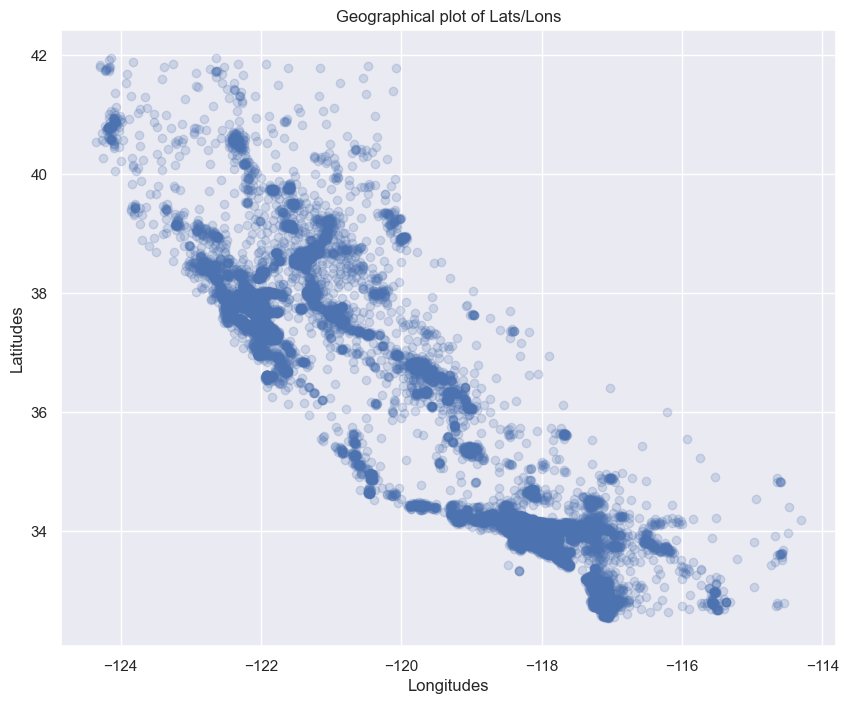

In [17]:
# geographical plot of Lats/Lons

sns.set()
plt.figure(figsize=(10,8))
plt.scatter(df['longitude'],df['latitude'], alpha=0.2)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

In [18]:
# explore the ocean_proximity column
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

[Text(0, 0, '9136'),
 Text(0, 0, '6551'),
 Text(0, 0, '2658'),
 Text(0, 0, '2290'),
 Text(0, 0, '5')]

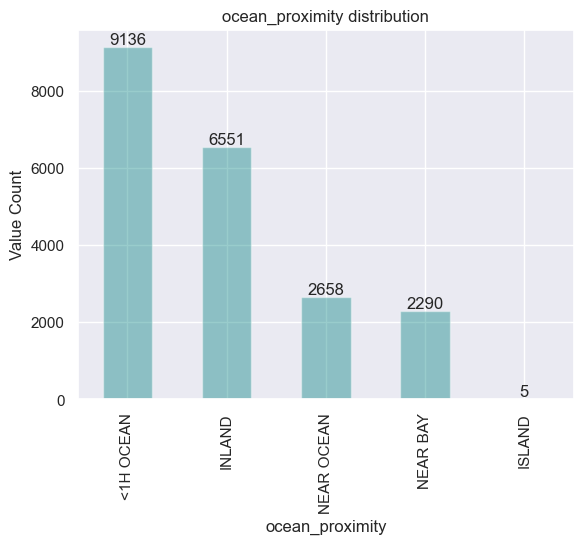

In [19]:
# plotting the distribution of ocean_proximity column

ax = ocean_values.plot.bar(title="ocean_proximity distribution", ylabel = "Value Count" , color = "teal" ,alpha = 0.4 )

ax.bar_label(ax.containers[0])


# Hnadling Missing Values

As per the histogram plot, total_bedrooms appear to be skewed and have few outliers. It would be best to fill these NA values with median value for total_bedrooms as the mean value will be heavily affected by outliers

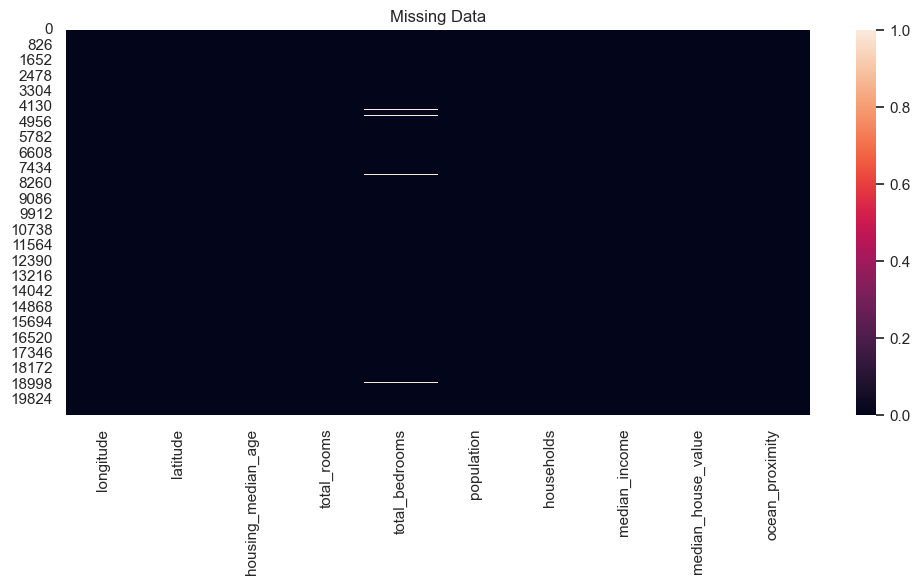

In [20]:
# showing missing data with heatmap before droping

plt.figure(figsize=(12,5))
sns.heatmap(df.isna());
plt.title('Missing Data')
plt.show()

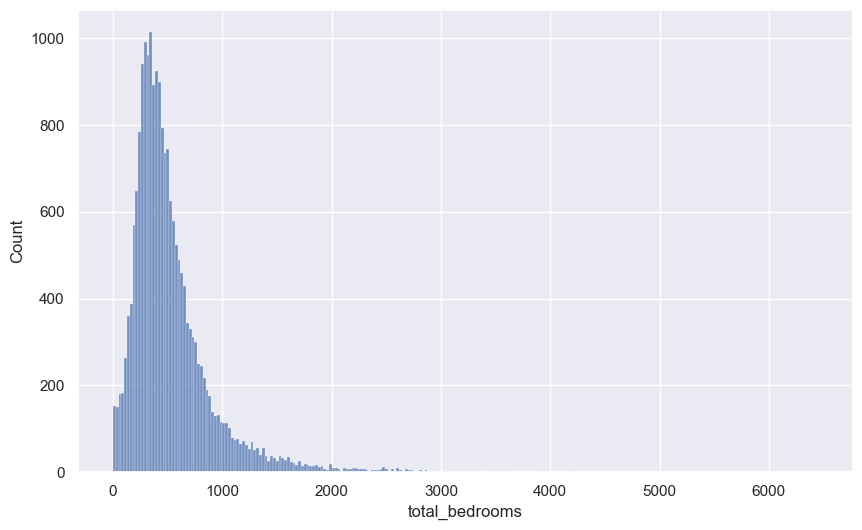

In [21]:
plt.figure(figsize= (10, 6))
sns.histplot(df['total_bedrooms']);

In [22]:
# fill NA with the median of total_bedrooms

total_bedrooms_median = df["total_bedrooms"].median()
df.total_bedrooms.fillna(total_bedrooms_median, inplace=True)

/var/folders/k4/6sbd2xf90_36m22h_wlmcjy40000gn/T/ipykernel_6843/3818827507.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.total_bedrooms.fillna(total_bedrooms_median, inplace=True)


In [23]:
# checking missing data 
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Handling Outliers

### median_house_value

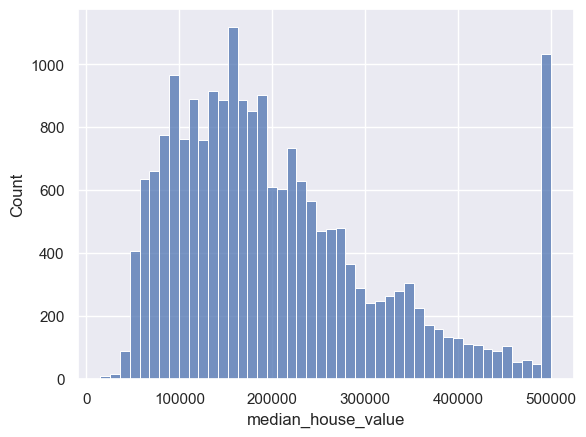

In [24]:
# taking a closer look at target variable to handle outliers

sns.histplot(df['median_house_value'])
plt.show()

In [25]:
house_value_q1 = df['median_house_value'].quantile(0.25)
house_value_q3 = df['median_house_value'].quantile(0.75)
house_value_iqr = house_value_q3 - house_value_q1 


In [26]:
# number of outliers
df['median_house_value'][df['median_house_value'] > house_value_q3 + (house_value_iqr * 1.5)].count()

1071

In [27]:
df = df[df['median_house_value'] < house_value_q3 + (house_value_iqr * 1.5)]
df.shape

(19569, 10)

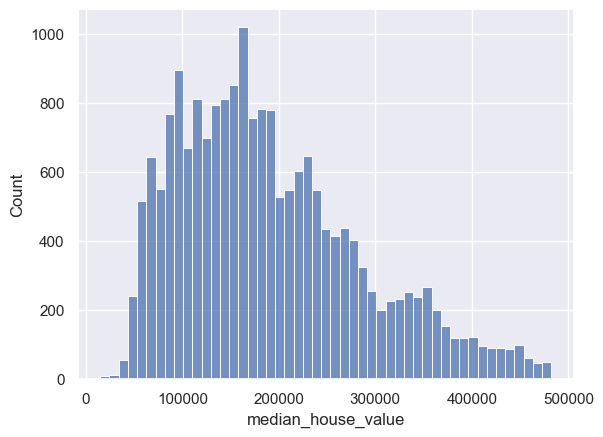

In [28]:
# Distribtion after removing outliers

sns.histplot(df['median_house_value'])
plt.show()

### households

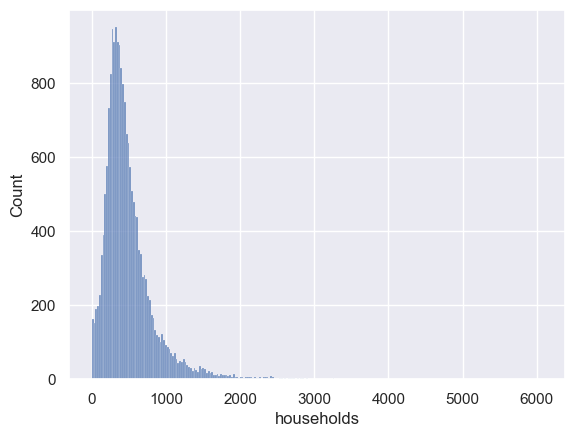

In [29]:
# taking a closer look at households variable to handle outliers

sns.histplot(df['households'])
plt.show()

In [30]:
households_q1 = df['households'].quantile(0.25)
households_q3 = df['households'].quantile(0.75)
households_iqr = households_q3 - households_q1

In [31]:
# number of outliers

df['households'][df['households'] > households_q3 + households_iqr * 1.5].count()

1158

In [32]:
df = df[df['households'] < households_q3 + households_iqr * 1.5]
df.shape

(18407, 10)

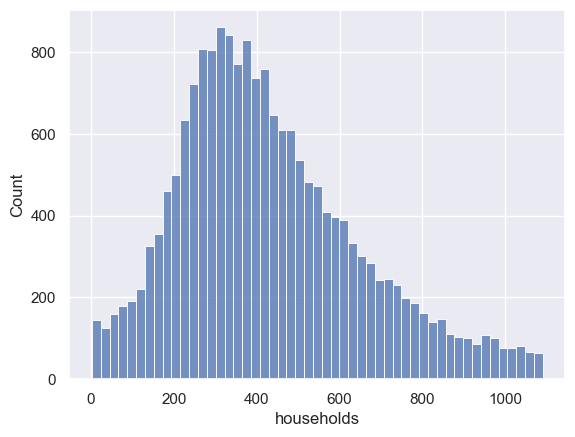

In [33]:
sns.histplot(df['households'])
plt.show()

### median_income

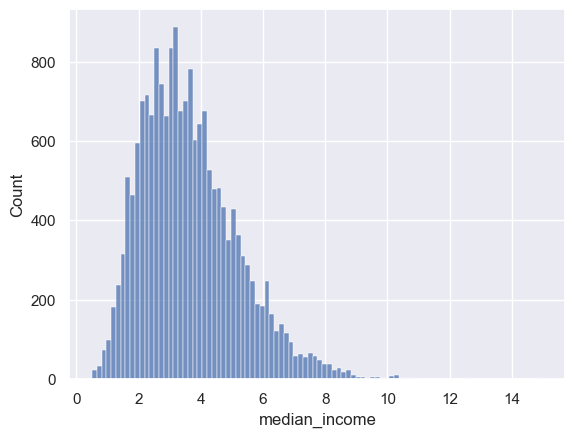

In [34]:
# taking a closer look at median_income variable to handle outliers

sns.histplot(df['median_income'])
plt.show()

In [35]:
median_income_q1 = df['median_income'].quantile(0.25)
median_income_q3 = df['median_income'].quantile(0.75)
median_income_iqr = median_income_q3 - median_income_q1

In [36]:
# number of outliers

df['median_income'][df['median_income'] > median_income_q3 + median_income_iqr * 1.5].count()

334

In [37]:
df = df[df['median_income'] < median_income_q3 + median_income_iqr * 1.5]
df.shape

(18073, 10)

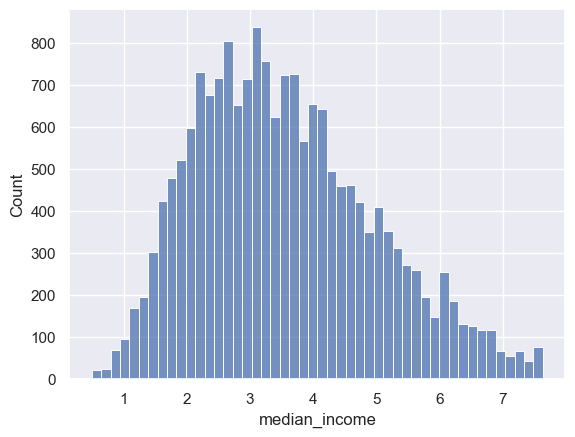

In [38]:
sns.histplot(df['median_income'])
plt.show()

# Encoding categorical variables

Converted categorical variables of ocean_proximity feature into numerical representations using label encoding where each category was assigned a Unique Integer value

In [39]:
## Label encode for categorical feature (ocean_proximity)

labelEncoder = LabelEncoder()
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])

df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  18073.000000  18073.000000        18073.000000  18073.000000   
mean    -119.585384     35.681159           29.219831   2237.514967   
std        2.004531      2.161550           12.273863   1235.751242   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.940000           19.000000   1391.000000   
50%     -118.550000     34.290000           30.000000   2016.000000   
75%     -118.020000     37.740000           37.000000   2866.000000   
max     -114.310000     41.950000           52.000000  12342.000000   

       total_bedrooms    population    households  median_income  \
count    18073.000000  18073.000000  18073.000000   18073.000000   
mean       464.204504   1257.836275    431.986887       3.560242   
std        244.121658    696.280694    221.014625       1.416915   
min          2.000000      3.000000      2.000000       0.499900   
25%        292.000000    777.000000    275.000000       2.487500   
50%        423.000000   1136.000000    395.000000       3.383900   
75%        598.000000   1616.000000    560.000000       4.476200   
max       2634.000000   8733.000000   1091.000000       7.634800   

       median_house_value  ocean_proximity  
count        18073.000000      18073.00000  
mean        186241.393017          1.15963  
std          92621.239490          1.40350  
min          14999.000000          0.00000  
25%         113500.000000          0.00000  
50%         169400.000000          1.00000  
75%         240700.000000          1.00000  
max         482200.000000          4.00000

# Scaling Numerical Features

Min-Max scaling was used to scale numerical features with huge ranges to a similar range to prevent certain features from dominating the analysis.



In [40]:
y = df["median_house_value"]
y

2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 18073, dtype: float64

In [41]:
x = df.drop(["median_house_value"] , axis = 1)

In [42]:
scaler = MinMaxScaler()

scaler.fit(x)

x_scaled = scaler.transform(x)

In [43]:
x_scaled

array([[0.21015936, 0.5642933 , 1.        , ..., 0.16069789, 0.94710508,
        0.75      ],
       [0.20916335, 0.5642933 , 1.        , ..., 0.19926538, 0.72085103,
        0.75      ],
       [0.20916335, 0.5642933 , 1.        , ..., 0.23599633, 0.46900447,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.39577594, 0.16820138,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.31864096, 0.19163548,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.48484848, 0.26471289,
        0.25      ]])

In [44]:
x_scaled = pd.DataFrame(x_scaled , columns= x.columns)

In [45]:
x_scaled.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  18073.000000  18073.000000        18073.000000  18073.000000   
mean       0.474563      0.333811            0.553330      0.181160   
std        0.199654      0.229708            0.240664      0.100142   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.257968      0.148778            0.352941      0.112561   
50%        0.577689      0.185972            0.568627      0.163209   
75%        0.630478      0.552604            0.705882      0.232091   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    18073.000000  18073.000000  18073.000000   18073.000000   
mean         0.175610      0.143738      0.394846       0.428926   
std          0.092751      0.079757      0.202952       0.198589   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.110182      0.088660      0.250689       0.278574   
50%          0.159954      0.129782      0.360882       0.404210   
75%          0.226444      0.184765      0.512397       0.557303   
max          1.000000      1.000000      1.000000       1.000000   

       ocean_proximity  
count     18073.000000  
mean          0.289908  
std           0.350875  
min           0.000000  
25%           0.000000  
50%           0.250000  
75%           0.250000  
max           1.000000

# Model Building  

Split the dataset into 80% train and 20% test dataset

In [46]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

# Multiple Linear Regression

In [47]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [48]:
reg.intercept_

318575.98856546864

In [49]:
reg.coef_


array([-374680.90760508, -344152.76289908,   45154.32544502,
       -223819.84577287,  362942.72916166, -391090.19699814,
        109765.6571997 ,  292983.20092388,   -3031.60749339])

In [50]:
Coeficient=pd.DataFrame(reg.coef_,x.columns,columns=["Coeficient"])
Coeficient

Coeficient
longitude          -374680.907605
latitude           -344152.762899
housing_median_age   45154.325445
total_rooms        -223819.845773
total_bedrooms      362942.729162
population         -391090.196998
households          109765.657200
median_income       292983.200924
ocean_proximity      -3031.607493

In [51]:
y_pred = reg.predict(X_test)
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_mae = mean_absolute_error(y_test , y_pred)
reg_R2_score = r2_score(y_test , y_pred)
p = len(X_train.columns)
n = len(y_train)
reg_adj_R2 = 1-((1-reg_R2_score)*(n-1)/(n-p-1))
reg_mape = mean_absolute_percentage_error(y_test , y_pred)


print('Training Score_reg: ', reg.score(X_train, y_train))
print('Testing Score_reg: ', reg.score(X_test, y_test))
print('MSE_reg: ',reg_mse)
print('RMSE_reg: ',reg_rmse)
print('MAE_reg: ',reg_mae)
print('R squared of linear regression :',reg_R2_score)
print('Adjacent R squared of linear regression : ',reg_adj_R2)
print("Mean  absolute precentage error of linear regression : ",reg_mape*100,'%')



Training Score_reg:  0.5917217157216295
Testing Score_reg:  0.5986976261807139
MSE_reg:  3555499321.002745
RMSE_reg:  59628.007857069526
MAE_reg:  44844.45254916223
R squared of linear regression : 0.5986976261807139
Adjacent R squared of linear regression :  0.5984476454661254
Mean  absolute precentage error of linear regression :  28.55591870845357 %


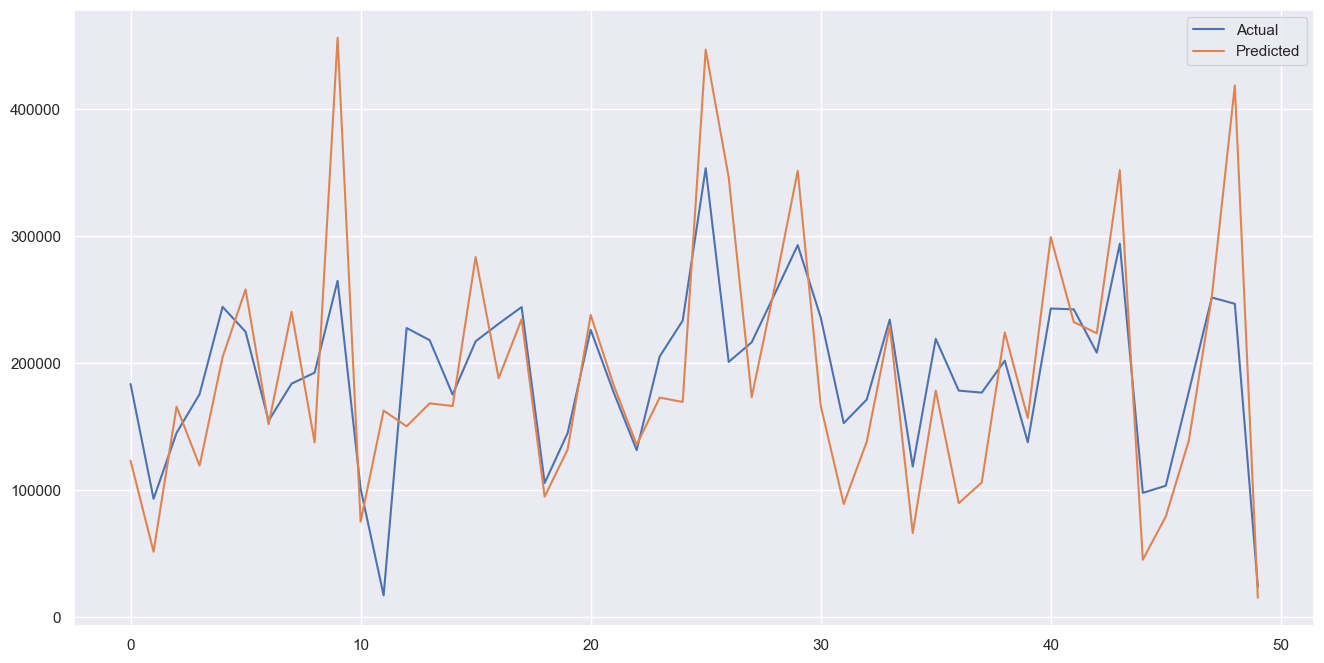

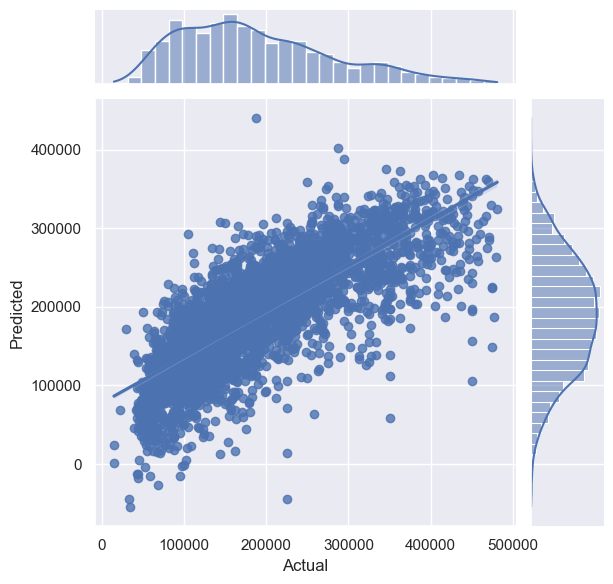

In [52]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# Decision Tree Regression

In [53]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [54]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([135048.14814815,  60741.17647059, 184608.81801126, ...,
       145206.22009569, 109128.        , 128028.57142857])

In [55]:
print(dtReg_y_pred[0:5])
print(y_test[0:5])

[135048.14814815  60741.17647059 184608.81801126 117855.23255814
 241524.15458937]
2218     123000.0
2090      51300.0
10917    165600.0
250      119100.0
20492    204600.0
Name: median_house_value, dtype: float64


In [56]:
dtReg_mse = mean_squared_error(y_test,dtReg_y_pred)
dtReg_rmse = np.sqrt(dtReg_mse)
dtReg_mae = mean_absolute_error(y_test , dtReg_y_pred)
dtReg_R2_score = r2_score(y_test , dtReg_y_pred)
p = len(X_train.columns)
n = len(y_train)
dtReg_adj_R2 = 1-(1-dtReg_R2_score)*(n-1)/(n-p-1)
dtReg_mape = mean_absolute_percentage_error(y_test , dtReg_y_pred)


print('Training Score_dtReg: ', dtReg.score(X_train, y_train))
print('Testing Score_dtReg: ', dtReg.score(X_test, y_test))
print('MSE_dtReg: ',dtReg_mse)
print('RMSE_dtReg: ',dtReg_rmse)
print('MAE_dtReg: ',dtReg_mae)
print('R squared of DecisionTreeRegressor :',dtReg_R2_score)
print('Adjacent R squared of DecisionTreeRegressor : ',dtReg_adj_R2)
print("Mean  absolute precentage error of DecisionTreeRegressor : ",dtReg_mape*100,'%')

Training Score_dtReg:  0.7611391570999471
Testing Score_dtReg:  0.6518608883811575
MSE_dtReg:  3084478078.6985855
RMSE_dtReg:  55538.07773679771
MAE_dtReg:  38321.58272934743
R squared of DecisionTreeRegressor : 0.6518608883811575
Adjacent R squared of DecisionTreeRegressor :  0.6516440243166108
Mean  absolute precentage error of DecisionTreeRegressor :  22.323246001974354 %


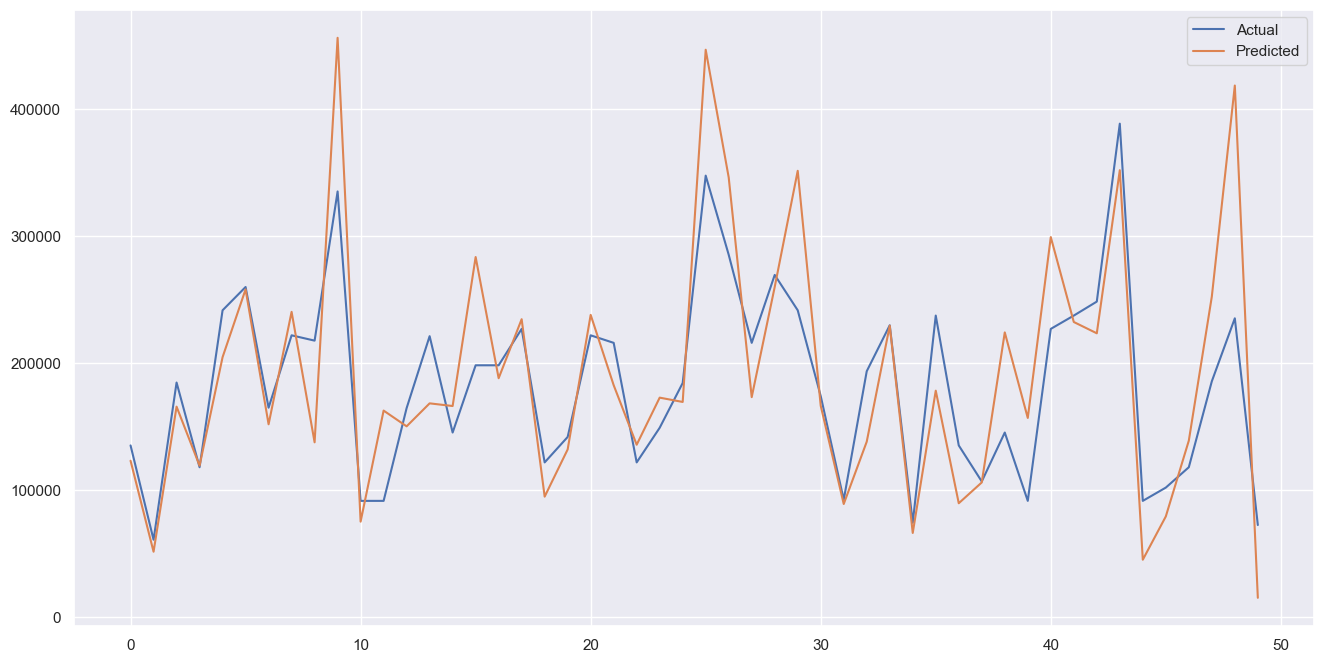

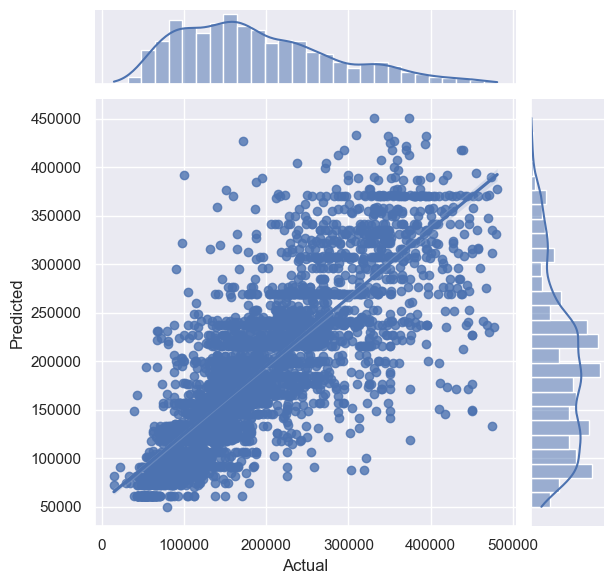

In [57]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# Bagging Regressor

In [58]:
bag = BaggingRegressor(estimator=dtReg,n_estimators=500, random_state=1)
bag.fit(X_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=9), n_estimators=500,
                 random_state=1)

In [59]:
bag_y_pred = bag.predict(X_test)
bag_y_pred

array([151506.56047644,  60006.97884906, 184675.30934576, ...,
       153192.27786737,  99083.62794741,  91493.22754808])

In [60]:
bag_mse = mean_squared_error(y_test,bag_y_pred)
bag_rmse = np.sqrt(bag_mse)
bag_mae = mean_absolute_error(y_test , bag_y_pred)
bag_R2_score = r2_score(y_test , bag_y_pred)
p = len(X_train.columns)
n = len(y_train)
bag_adj_R2 = 1-(1-bag_R2_score)*(n-1)/(n-p-1)
bag_mape = mean_absolute_percentage_error(y_test , bag_y_pred)


print('Training Score_bag: ', bag.score(X_train, y_train))
print('Testing Score_bag: ', bag.score(X_test, y_test))
print('MSE_bag: ',bag_mse)
print('RMSE_bag: ',bag_rmse)
print('MAE_bag: ',bag_mae)
print('R squared of Bagging Regressor :',bag_R2_score)
print('Adjacent R squared of Bagging Regressor : ',bag_adj_R2)
print("Mean  absolute precentage error of Bagging Regressor : ",bag_mape*100,'%')

Training Score_bag:  0.8066038454608884
Testing Score_bag:  0.7309363036416088
MSE_bag:  2383877724.430178
RMSE_bag:  48824.97029625495
MAE_bag:  34073.12228630268
R squared of Bagging Regressor : 0.7309363036416088
Adjacent R squared of Bagging Regressor :  0.730768697518462
Mean  absolute precentage error of Bagging Regressor :  20.28553160618365 %


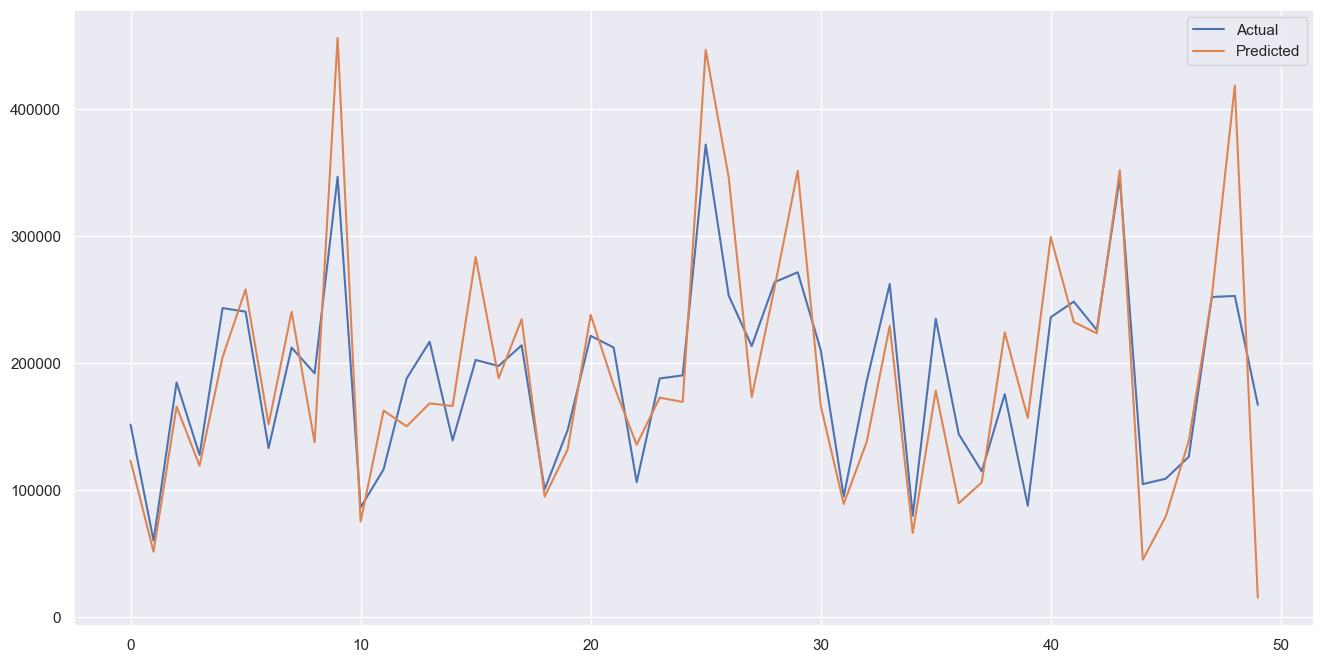

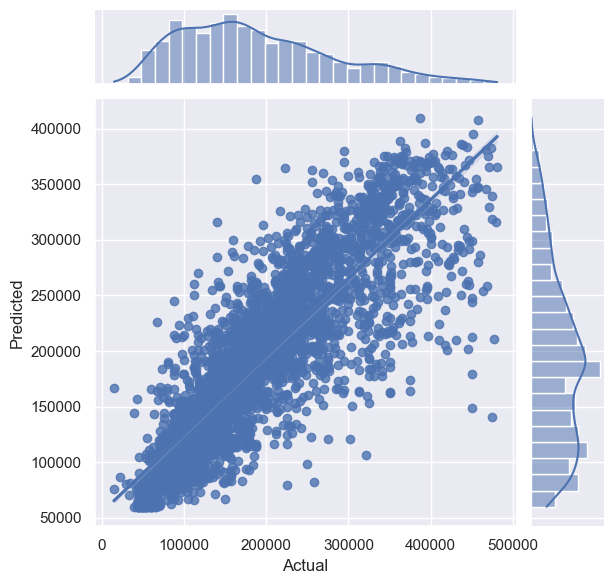

In [61]:
test = pd.DataFrame({'Predicted':bag_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# AdaBoost Regressor

In [62]:
AdaBoost = AdaBoostRegressor(estimator=dtReg, random_state=1, n_estimators=100)
AdaBoost.fit(X_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9),
                  n_estimators=100, random_state=1)

In [63]:
AdaBoost_y_pred = AdaBoost.predict(X_test)
AdaBoost_y_pred

array([152787.3015873 ,  94606.41025641, 188500.        , ...,
       189749.93678887, 131930.71428571, 117986.74698795])

In [64]:
AdaBoost_mse = mean_squared_error(y_test,AdaBoost_y_pred)
AdaBoost_rmse = np.sqrt(AdaBoost_mse)
AdaBoost_mae = mean_absolute_error(y_test , AdaBoost_y_pred)
AdaBoost_R2_score = r2_score(y_test , AdaBoost_y_pred)
p = len(X_train.columns)
n = len(y_train)
AdaBoost_adj_R2 = 1-(1-AdaBoost_R2_score)*(n-1)/(n-p-1)
AdaBoost_mape = mean_absolute_percentage_error(y_test , AdaBoost_y_pred)


print('Training Score_AdaBoost: ', AdaBoost.score(X_train, y_train))
print('Testing Score_AdaBoost: ', AdaBoost.score(X_test, y_test))
print('MSE_AdaBoost: ',AdaBoost_mse)
print('RMSE_AdaBoost: ',AdaBoost_rmse)
print('MAE_AdaBoost: ',AdaBoost_mae)
print('R squared of AdaBoost Regressor :',AdaBoost_R2_score)
print('Adjacent R squared of AdaBoost Regressor : ',AdaBoost_adj_R2)
print("Mean  absolute precentage error of AdaBoost Regressor : ",AdaBoost_mape*100,'%')

Training Score_AdaBoost:  0.8544828865734461
Testing Score_AdaBoost:  0.7466077664089558
MSE_AdaBoost:  2245030115.0873203
RMSE_AdaBoost:  47381.74875505673
MAE_AdaBoost:  36894.570391560555
R squared of AdaBoost Regressor : 0.7466077664089558
Adjacent R squared of AdaBoost Regressor :  0.7464499224096258
Mean  absolute precentage error of AdaBoost Regressor :  25.349692749529567 %


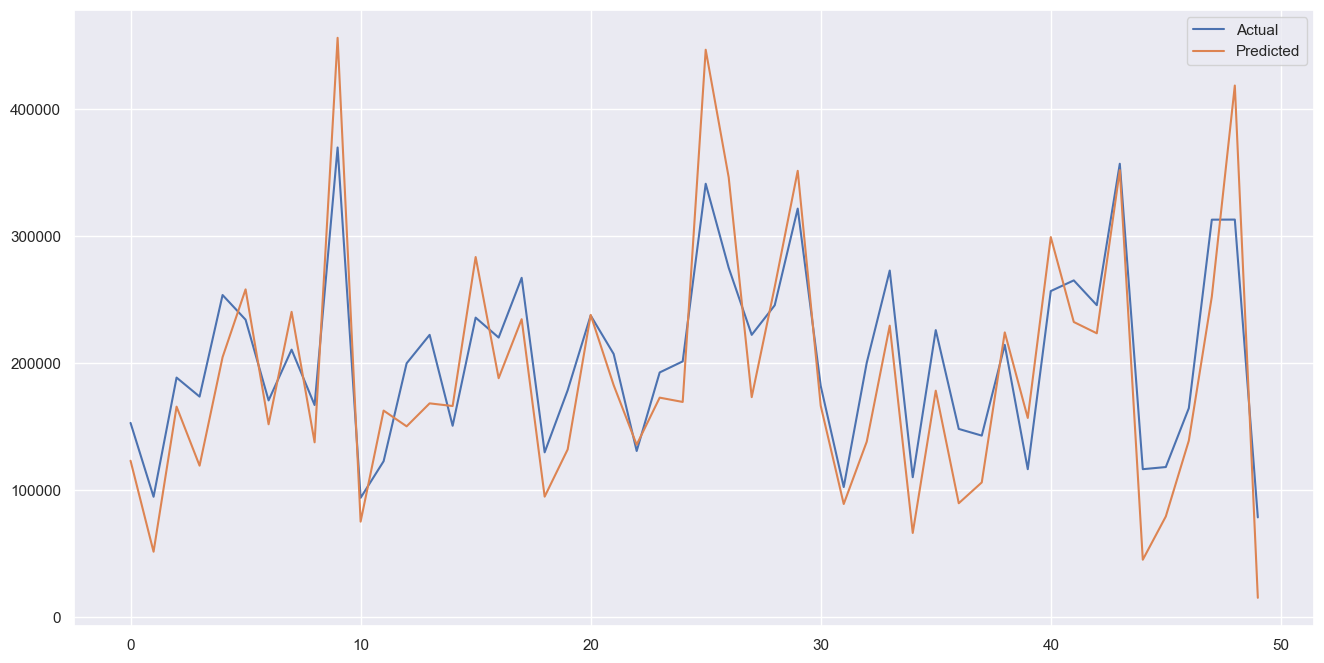

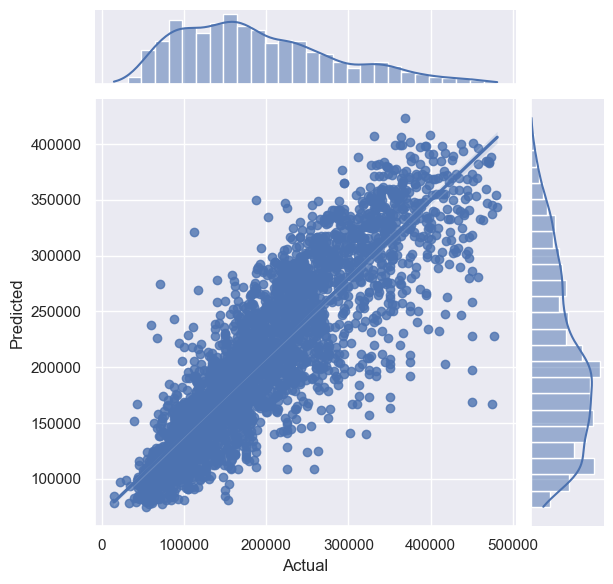

In [65]:
test = pd.DataFrame({'Predicted':AdaBoost_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# Random Forest Regression

In [66]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [67]:
rfReg_y_pred = rfReg.predict(X_test)
rfReg_y_pred

array([133120.        ,  54180.        , 164756.66666667, ...,
       165930.        ,  96796.66666667, 101243.33333333])

In [68]:
rfReg_mse = mean_squared_error(y_test,rfReg_y_pred)
rfReg_rmse = np.sqrt(rfReg_mse)
rfReg_mae = mean_absolute_error(y_test , rfReg_y_pred)
rfReg_R2_score = r2_score(y_test , rfReg_y_pred)
p = len(X_train.columns)
n = len(y_train)
rfReg_adj_R2 = 1-(1-rfReg_R2_score)*(n-1)/(n-p-1)
rfReg_mape = mean_absolute_percentage_error(y_test , rfReg_y_pred)


print('Training Score_rfReg: ', rfReg.score(X_train, y_train))
print('Testing Score_rfReg: ', rfReg.score(X_test, y_test))
print('MSE_rfReg: ',rfReg_mse)
print('RMSE_rfReg: ',rfReg_rmse)
print('MAE_rfReg: ',rfReg_mae)
print('R squared of RandomForestRegressor :',rfReg_R2_score)
print('Adjacent R squared of RandomForestRegressor : ',rfReg_adj_R2)
print("Mean  absolute precentage error of RandomForestRegressor : ",rfReg_mape*100,'%')

Training Score_rfReg:  0.964496817081466
Testing Score_rfReg:  0.7704970699802525
MSE_rfReg:  2033373249.4211748
RMSE_rfReg:  45092.94012837458
MAE_rfReg:  30405.45643153527
R squared of RandomForestRegressor : 0.7704970699802525
Adjacent R squared of RandomForestRegressor :  0.7703541071916189
Mean  absolute precentage error of RandomForestRegressor :  17.689643853328796 %


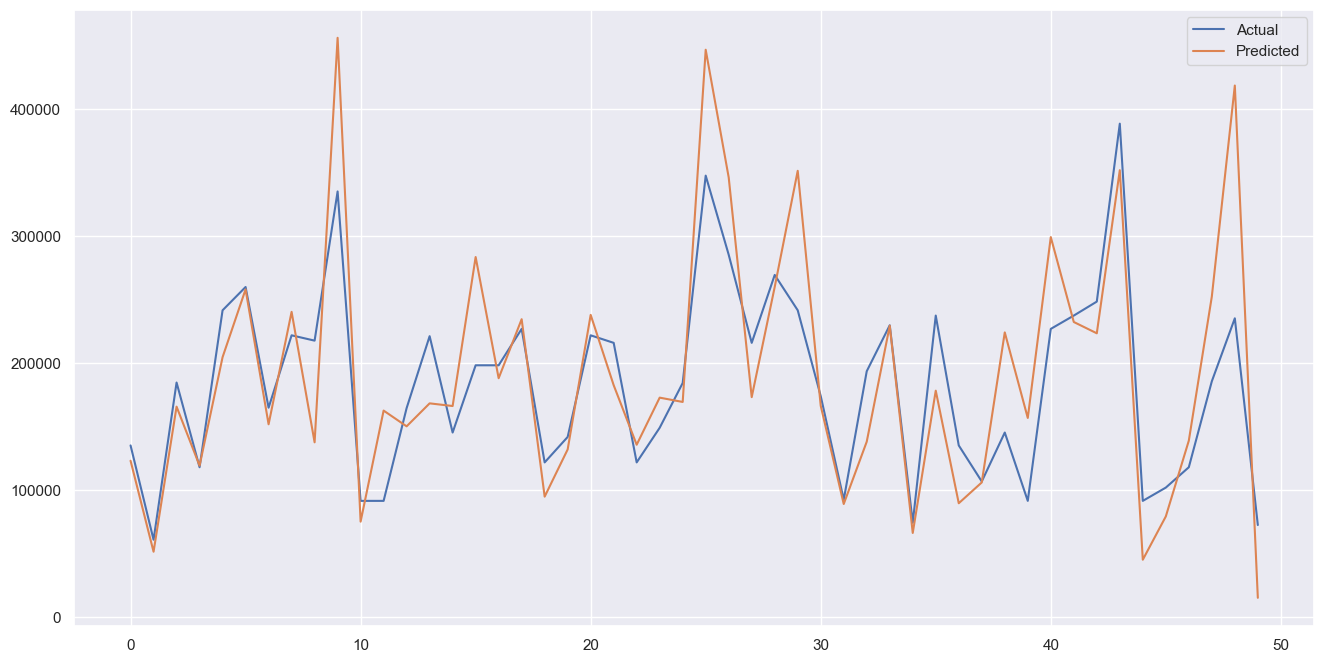

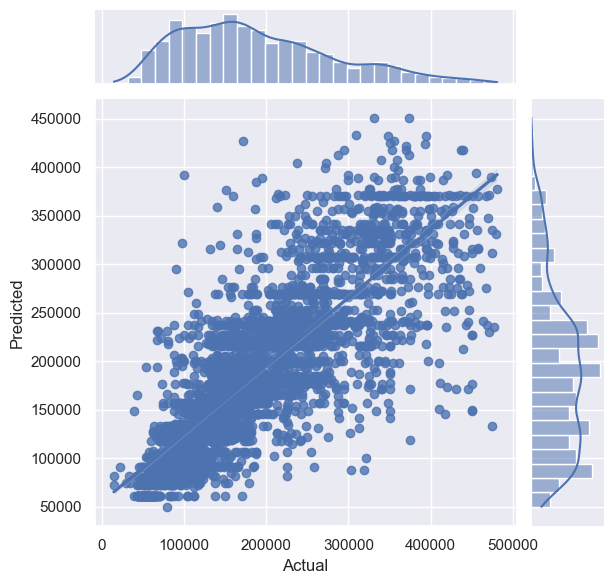

In [69]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")